In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

import warnings; warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#read in survey data and drop misc. columns
surveyData = pd.read_csv("OSMI Mental Health in Tech Survey 2017.csv")
print(surveyData.shape)
surveyData = surveyData.drop(['#', '<strong>Do you have previous employers?</strong>', '<strong>Are you self-employed?</strong>', 'Network ID', 'Start Date (UTC)', 'Submit Date (UTC)'], axis = 1)
print(surveyData.shape)

#how many respondents answered all questions?
all_row = surveyData.dropna(axis=0)
print(all_row.shape)

#how many questions were answered by all respondents 
all_col = surveyData.dropna(axis=1)
print(all_col.shape)

surveyData.head()

(756, 123)
(756, 117)
(0, 117)
(756, 8)


,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",<strong>Would you have been willing to discuss your ment

(756, 58)


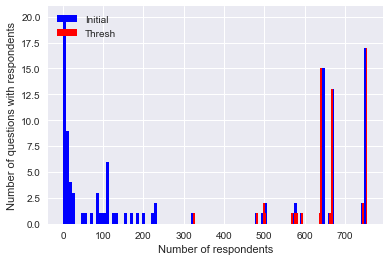

In [4]:
surveyData_resp_counts = surveyData.count(axis = 0).sort_values()
surveyData_resp_counts.hist(bins = 100, color="blue", label = 'Initial')
plt.xlabel('Number of respondents')
plt.ylabel('Number of questions with respondents')
plt.legend(loc='upper left')

surveyData_resp_thresh = surveyData.dropna(axis=1, thresh=300)
print(surveyData_resp_thresh.shape)

surveyData_resp_thresh_counts = surveyData_resp_thresh.count(axis = 0).sort_values()
surveyData_resp_thresh_counts.hist(bins = 100, color="red", label = 'Thresh')
plt.legend(loc='upper left')

In [ ]:
#print(surveyData_resp_thresh.info())
surveyData_resp_thresh.head()

In [18]:
why = surveyData_resp_thresh.filter(like='Why', axis=1).columns.values
briefly  = surveyData_resp_thresh.filter(like='Briefly ', axis=1).columns.values

In [19]:
surveyData_resp_thresh.drop(why, inplace=True, axis=1)
surveyData_resp_thresh.drop(briefly, inplace=True, axis=1)

In [ ]:
surveyData_cont = surveyData_resp_thresh.select_dtypes(include=['float', 'int']).copy()
surveyData_cont.head()

In [ ]:
surveyData_cat = surveyData_resp_thresh.select_dtypes(include=['object']).copy()
surveyData_cat.head()

In [20]:
surveyData = surveyData_resp_thresh.copy()
surveyData['Gender_old'] = surveyData['What is your gender?']
surveyData['What is your gender?'] = surveyData['What is your gender?'].fillna('NaN')
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[f].*', 'F', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[w].*', 'F', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[md][^y].*', 'M', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[ngau][egho][nhe].*', 'NB', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[c][i][s].{1,2}[mh].*', 'M', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[c][i][s].{1,2}[f].*', 'F', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[t].*', 'T', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[sgcm][yo][ nmd].*', 'NaN', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('\\\-', 'NaN', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('n/a', 'NaN', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('m', 'M', case=False)
surveyData['What is your gender?'].value_counts()

M      504
F      219
NaN     18
NB      13
T        2
Name: What is your gender?, dtype: int64

In [21]:
surveyData['Gender_cat'] = surveyData["What is your gender?"].astype('category').cat.codes
surveyData['Gender_cat'].unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [25]:
surveyData['Country'] = surveyData["What country do you <strong>work</strong> in?"].astype('category').cat.codes
surveyData['Country'].unique()

array([44, 45, 41, 17, 33,  3, 13,  7, 20, 16, 22, 18, 31, 32, 11, 29,  1,
       37, 40, 34, 38, 23, 15,  8,  6, 28, 21,  0, 10, 14,  2, 27, 12, 26,
       39,  5, 43, 19, 30,  4, 35, 36, 25, 42,  9, 24, -1], dtype=int64)

In [28]:
surveyData['Race'] = surveyData["What is your race?"].astype('category').cat.codes
surveyData['Race']

0     -1
1     -1
2      4
3      4
4      3
5      4
6      0
7      4
8     -1
9     -1
10     4
11     4
12    -1
13     4
14     1
15     4
16    -1
17     4
18    -1
19    -1
20    -1
21    -1
22     4
23    -1
24    -1
25    -1
26     4
27     4
28    -1
29     4
30     4
31     1
32    -1
33    -1
34     3
35    -1
36     4
37     4
38    -1
39     4
40     2
41     2
42     4
43     1
44     2
45     4
46     4
47    -1
48    -1
49     4
50     4
51    -1
52     4
53    -1
54    -1
55    -1
56     4
57    -1
58    -1
59    -1
60    -1
61     4
62    -1
63    -1
64     4
65    -1
66    -1
67     4
68     4
69     4
70     4
71     4
72     4
73     4
74     2
75     4
76    -1
77    -1
78    -1
79     0
80    -1
81     4
82    -1
83     4
84     4
85    -1
86    -1
87     4
88     4
89    -1
90     4
91    -1
92     4
93    -1
94     4
95    -1
96     4
97    -1
98     4
99     4
100    4
101   -1
102    4
103   -1
104    4
105   -1
106   -1
107    4
108    4
109   -1
110   -1
1

In [22]:
size = surveyData['How many employees does your company or organization have?']
size = size.fillna('NaN')
size_cont = []
for i, row in size.iteritems():
    if row == '6-25':
        size = 15
        size_cont.append(size)
    if row == '100-500':
        size = 250
        size_cont.append(size)
    if row == 'NaN':
        size = None
        size_cont.append(size)
    if row == '26-100':
        size = 75
        size_cont.append(size)
    if row == '500-1000':
        size = 750
        size_cont.append(size)
    if row == 'More than 1000':
        size = 1000
        size_cont.append(size)
    if row == '1-5':
        size = 3
        size_cont.append(size)

len(size_cont)

surveyData['Org_size'] = size_cont

In [30]:
surveyData.head()

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Have you ever had a coworker discuss their or another coworker's mental health with you?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,<strong>Would you have been willing to discuss your mental health with your coworkers at previous employers?</strong>,Did you ever discuss your mental health with a previous coworker(s)?,Did you ever have a previous coworker discuss their or another coworker's mental health with you?,"Overall, how much importance did your previous employer place on physical health?","Overall, how much importance did your previous employer place on mental health?",Do you currently have a mental health disorder?,Have you ever been diagnosed with a mental health disorder?,Have you had a mental health disorder in the past?,Have you ever sought treatment for a mental health disorder from a mental health professional?,Do you have a family history of mental illness?,"If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>","If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when <em>NOT</em> being treated effectively (i.e., when you are experiencing symptoms)?</strong>",Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,How willing would you be to share with friends and family that you have a mental illness?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your mental health with a potential employer in an interview?,Are you openly identif

In [34]:
for i, row in surveyData.iteritems():
    print(i, row.unique())

How many employees does your company or organization have? ['100-500' '6-25' 'More than 1000' nan '26-100' '1-5' '500-1000']
Is your employer primarily a tech company/organization? [  1.  nan   0.]
Is your primary role within your company related to tech/IT? [  1.  nan   0.]
Does your employer provide mental health benefits as part of healthcare coverage? ['No' 'Yes' "I don't know" nan 'Not eligible for coverage / NA']
Do you know the options for mental health care available under your employer-provided health coverage? ['Yes' 'No' nan]
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)? ['No' "I don't know" nan 'Yes']
Does your employer offer resources to learn more about mental health disorders and options for seeking help? ["I don't know" 'No' nan 'Yes']
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer? ["I do

In [ ]:
curr_mh = surveyData_cat['Do you currently have a mental health disorder?'].value_counts(normalize=True)
sns.barplot(curr_mh.index, curr_mh.values,  alpha=0.9 , order = ['Yes', 'No', 'Possibly', 'Don\'t know'])
plt.title('Current mental health status')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.show()

In [ ]:
mh_by_size= surveyData_cat.groupby('How many employees does your company or organization have?')['Do you currently have a mental health disorder?'].value_counts(normalize=True)
sns.barplot(mh_by_size.index, mh_by_size.values,  alpha=0.9)
plt.title('Current mental health status across company sizes')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
mh_by_options= surveyData_cat.groupby('Do you currently have a mental health disorder?')['Do you know the options for mental health care available under your employer-provided health coverage?'].value_counts(normalize=True)
sns.barplot(mh_by_options.index, mh_by_options.values,  alpha=0.9, order = answers)
plt.title('Mental health status and knowledge of mental health options')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.xticks(rotation=90)
mental = surveyData_cat['Do you currently have a mental health disorder?'].unique()
options = surveyData_cat['Do you know the options for mental health care available under your employer-provided health coverage?'].unique()
options = options[0:2]
mental = [mental[1], mental[2]]
answers = ((mental[0], options[0]), (mental[0], options[1]), (mental[1], options[0]), (mental[1], options[1]))
plt.show()

In [ ]:
willingness = surveyData.groupby('Do you currently have a mental health disorder?')['How willing would you be to share with friends and family that you have a mental illness?'].median()
sns.barplot(willingness.index, willingness.values,  alpha=0.9, order = ['Yes', 'No', 'Possibly', 'Don\'t know'])
plt.title('Willingness to share across mental health status')
plt.ylabel('Median willingenss', fontsize=12)
plt.xlabel('Do you currently have a mental health disorder?', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [38]:
surveyData_cont_clean = surveyData[['Race', 'Country', 'Org_size', 'Gender_cat', 'What is your age?', 'Overall, how much importance does your employer place on physical health?', 'Overall, how much importance does your employer place on mental health?', 'How willing would you be to share with friends and family that you have a mental illness?', 'Overall, how well do you think the tech industry supports employees with mental health issues?']]
surveyData_cont_clean.head()


,Race,Country,Org_size,Gender_cat,What is your age?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",How willing would you be to share with friends and family that you have a mental illness?,"Overall, how well do you think the tech industry supports employees with mental health issues?"
0,-1,44,250.0,0,27.0,6.0,0.0,5,1.0
1,-1,44,250.0,1,31.0,7.0,2.0,4,2.0
2,4,45,15.0,1,36.0,0.0,1.0,5,1.0
3,4,45,1000.0,1,22.0,7.0,5.0,10,2.0
4,3,45,NaN,0,52.0,NaN,NaN,10,1.0
